### Анализ пользовательского поведения в мобильном приложении

### Описание сгенерированных таблиц проекта

Датасет представляет собой симуляцию пользовательского поведения в Telegram, включая активность, использование функций и оформление подписки Telegram Premium. Ниже приведены описания всех таблиц, полученных в ходе генерации данных.


1. `telegram_user_data.csv`

Содержит информацию о 10000 пользователях платформы.

•	user_id — уникальный идентификатор пользователя \
•	location — город пользователя (6 основных городов России) \
•	activity_category — уровень активности (active, medium, rare) \
•	is_premium — флаг, показывающий наличие подписки на 01.01.2023 (1 — есть подписка, 0 — нет) \
•	dominant_platform — преобладающая платформа пользователя (iOS, Android, Desktop)
    
2. `telegram_logs.csv`

Логи всех пользовательских действий (включая действия до и после подписки)

•	user_id \
•	session_id — уникальный идентификатор сессии \
•	timestamp — время события \
•	event_type — тип события (например: view_main_screen, send_message, buy_premium, и т.д.)

Особенность:
Пользователи с подпиской проявляют более высокую активность после подписки (увеличенный множитель event_multiplier = 1.4).


3. `telegram_premium_purchases.csv`

Информация о покупках премиум-подпискок в январе 2023.

•	user_id \
•	timestamp — дата покупки \
•	subscription_type — тип подписки (3_months, 6_months, 12_months) \
•	purchase_source — откуда оформлена покупка (in-app или website) \
•	purchase_price — цена в зависимости от типа подписки
    

4. `telegram_premium_historical_2022.csv`

История премиум-подписок пользователей за 2022 год (для расчёта флага is_premium на начало 2023 года).

•	user_id \
•	timestamp — дата покупки \
•	subscription_type — тип подписки \
•	purchase_source \
•	purchase_price \
•	subscription_end — автоматически рассчитанная дата окончания подписки
    


**Дополнительно**

Количество сессий и событий в месяц у пользователя может сильно варьироваться в зависимости от его активности и поведения в приложении.



1. `Количество сессий в месяц (Sessions per User per Month)`

Обычно, частота использования Telegram зависит от типа пользователя:

•	Очень активные пользователи (20%) — используют Telegram ежедневно: ~30 сессий в месяц \
•	Среднеактивные пользователи (50%) — используют несколько раз в неделю: 8-20 сессий в месяц \
•	Редкие пользователи (30%) — заходят 1-5 раз в месяц

В среднем можно ожидать от **10 до 25** сессий на пользователя в месяц.



2.`Количество событий в сессии (Events per Session)`

Каждая сессия может включать разные активности, например:

•	Простые сессии (10-15%) — просто просмотр сообщений (~ 1-3 события) \
•	Средние сессии (50-60%) — переписка, реакции, пересылка (~ 5-20 событий) \
•	Длинные сессии (20-30%) — активные чаты, звонки, просмотр каналов (~ 20-50 событий)

В среднем можно ожидать от **5 до 30** событий в сессии.



3. `Итоговая оценка по пользователям`

Если взять средние значения:

•	Очень активный пользователь → 30+ сессий в месяц, 20-50 событий в каждой \
•	Средний пользователь → 15 сессий в месяц, по 10-15 событий в каждой \
•	Редкий пользователь → 5 сессий в месяц, 3-10 событий в каждой


В среднем на одного пользователя за месяц:

•	150-300 событий (≈ 15 сессий × 10-20 событий) \
•	Общий объем событий в логах → 10 000 пользователей × 150-300 событий = 1.5M – 3M событий в месяц




`Вывод:`

**Зададим средний диапазон (10-25 сессий в месяц, 5-30 событий в сессии)**


### Загрузка данных:

In [287]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Загрузка таблиц
user_data_df = pd.read_csv("telegram_user_data.csv")
logs_df = pd.read_csv("telegram_logs.csv", parse_dates=['timestamp'])
premium_purchases_df = pd.read_csv("telegram_premium_purchases.csv", parse_dates=['timestamp'])
premium_purchases_hist_df = pd.read_csv("telegram_premium_historical_2022.csv", parse_dates=['timestamp'])

### Exploratory Data Analysis (EDA):

In [288]:
print("User data:", user_data_df.shape)
print("Logs:", logs_df.shape)
print("Premium purchases:", premium_purchases_df.shape)
print("Historical premium purchases:", premium_purchases_hist_df.shape)

user_data_df.head()

User data: (20000, 5)
Logs: (5482949, 5)
Premium purchases: (1578, 5)
Historical premium purchases: (2415, 6)


,user_id,location,activity_category,is_premium,dominant_platform
0,1,Ekaterinburg,medium,0,iOS
1,2,Kazan,medium,0,iOS
2,3,Novosibirsk,medium,0,iOS
3,4,Kazan,medium,0,Android
4,5,Kazan,medium,0,iOS


In [291]:
print(logs_df.duplicated().sum())
print(user_data_df.duplicated().sum())
print(premium_purchases_df.duplicated().sum())
print(premium_purchases_hist_df.duplicated().sum())

0
0
0
0


In [290]:
# logs_df = logs_df.drop_duplicates()

In [292]:
# logs_df

,user_id,session_id,timestamp,event_type,platform
0,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-03-25 08:07:32,buy_gift,iOS
1,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-03-25 10:44:05,view_main_screen,iOS
2,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-03-25 06:36:05,send_message,iOS
3,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-03-25 15:38:51,send_message,iOS
4,1,bdd640fb-0667-4ad1-9c80-317fa3b1799d,2023-03-25 19:14:52,react_to_message,iOS
...,...,...,...,...,...
5482944,20000,45dca365-bddf-4e46-8d71-48fcc29a4349,2023-01-31 07:09:52,view_main_screen,iOS
5482945,20000,45dca365-bddf-4e46-8d71-48fcc29a4349,2023-01-31 16:53:50,view_main_screen,iOS
5482946,20000,45dca365-bddf-4e46-8d71-48fcc29a4349,2023-01-31 02:25:26,video_call,iOS
5482947,20000,45dca365-bddf-4e46-8d71-48fcc29a4349,2023-01-31 01:18:39,react_to_message,iOS


In [293]:
dfs = [
    ("logs_df", logs_df),
    ("user_data_df", user_data_df),
    ("premium_purchases_df", premium_purchases_df),
    ("premium_purchases_hist_df", premium_purchases_hist_df)
]

for name, df in dfs:
    if name == 'logs_df':
        check = ["user_id", "timestamp", "event_type"]
    elif name == 'user_data_df':
        check = ["user_id"]
    elif name == 'premium_purchases_df' or name == 'premium_purchases_hist_df':
        check = ["user_id", "timestamp"]

        
    if all(col in df.columns for col in check):
        # Посчитаем дубли по комбинации ключевых полей
        duplicate_events = df[df.duplicated(subset=check, \
                                            keep=False)]

        # Посмотрим сколько их
        print(f"{name}: найдено {len(duplicate_events)} дублирующихся событий.")
    else:
        print(f"{name}: нет нужных колонок для проверки.")

logs_df: найдено 22 дублирующихся событий.
user_data_df: найдено 0 дублирующихся событий.
premium_purchases_df: найдено 0 дублирующихся событий.
premium_purchases_hist_df: найдено 0 дублирующихся событий.


In [294]:
logs_df[logs_df.duplicated(subset=["user_id", "timestamp", "event_type"], \
                          keep = False)].head(6)

,user_id,session_id,timestamp,event_type,platform
7681,29,7135f221-a6c9-437f-84da-d06a7872bdeb,2023-01-28 11:43:52,open_chat,Android
7986,29,d32e6dcd-83bc-4478-9d6a-c7b86778043b,2023-01-28 11:43:52,open_chat,Android
147116,527,efe5f873-da60-414c-9f16-bfe5df8b6c1c,2023-06-06 17:18:22,open_dialog,iOS
147162,527,10e436c9-3d53-4dee-b41e-2e7c00da1e3f,2023-06-06 17:18:22,open_dialog,iOS
424625,1505,0d75ab61-8678-4aa8-9b3a-f3897efbf9d8,2023-06-22 09:27:47,post_story,Android
425301,1505,4cf04e09-84e8-4640-8f8e-02481bdcb558,2023-06-22 09:27:47,post_story,Android


Удалю дубли, оставив первую из повторяющихся строк

In [ ]:
logs_df.drop_duplicates(subset=["user_id", "timestamp", "event_type"], \
                        keep='first', \
                        inplace=True)

#### Проверка категориальных данных

In [298]:
print(f"event_type in logs_df: {logs_df['event_type'].unique()}", end = '\n\n')
print(f"platforms in logs_df: {logs_df['platform'].unique()}", end = '\n\n')

print(f"location in user_data_df: {user_data_df['location'].unique()}", end = '\n\n')
print(f"activity_category in user_data_df: {user_data_df['activity_category'].unique()}", end = '\n\n')
print(f"dominant_platform in user_data_df: {user_data_df['dominant_platform'].unique()}", end = '\n\n')

print(f"subscription_type in premium_purchases_df: {premium_purchases_df['subscription_type'].unique()}", end = '\n\n')
print(f"purchase_source in premium_purchases_df: {premium_purchases_df['purchase_source'].unique()}", end = '\n\n')
print(f"purchase_price in premium_purchases_df: {premium_purchases_df['purchase_price'].unique()}", end = '\n\n')

print(f"subscription_type in premium_purchases_hist_df: {premium_purchases_hist_df['subscription_type'].unique()}", end = '\n\n')
print(f"purchase_source in premium_purchases_hist_df: {premium_purchases_hist_df['purchase_source'].unique()}", end = '\n\n')
print(f"purchase_price in premium_purchases_hist_df: {premium_purchases_hist_df['purchase_price'].unique()}", end = '\n\n')

event_type in logs_df: ['buy_gift' 'view_main_screen' 'send_message' 'react_to_message'
 'send_voice_message' 'open_chat' 'send_sticker' 'video_call'
 'open_dialog' 'send_video_message' 'voice_call' 'buy_premium'
 'extra_cloud_storage' 'post_story' 'extra_reactions' 'voice_to_text'
 'custom_profile' 'use_custom_emoji' 'emoji_status_profile'
 'telegram_app_icon' 'animated_profile_picture']

platforms in logs_df: ['iOS' 'Desktop' 'Android']

location in user_data_df: ['Ekaterinburg' 'Kazan' 'Novosibirsk' 'Saint Petersburg' 'Nizhny Novgorod'
 'Moscow']

activity_category in user_data_df: ['medium' 'active' 'rare']

dominant_platform in user_data_df: ['iOS' 'Android']

subscription_type in premium_purchases_df: ['3_months' '6_months' '12_months']

purchase_source in premium_purchases_df: ['in-app' 'website']

purchase_price in premium_purchases_df: [ 899 1690 3190]

subscription_type in premium_purchases_hist_df: ['3_months' '6_months' '12_months']

purchase_source in premium_purchases_his

<Axes: >

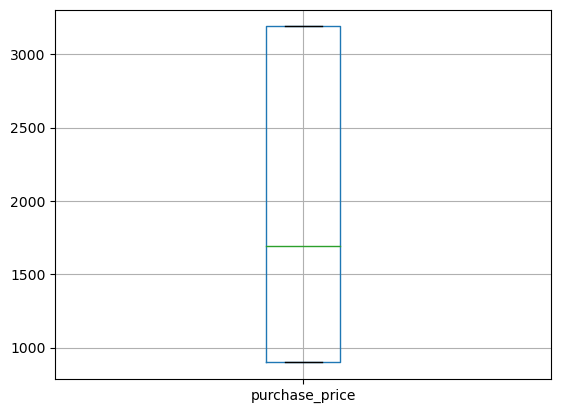

In [299]:
premium_purchases_df.boxplot(column='purchase_price')

#### Проверка временных данных

In [300]:
# Проверка диапазона дат
min_date = logs_df['timestamp'].min()
max_date = logs_df['timestamp'].max()
print(f"Минимальная дата: {min_date}, Максимальная дата: {max_date}")

min_date = premium_purchases_df['timestamp'].min()
max_date = premium_purchases_df['timestamp'].max()
print(f"Минимальная дата: {min_date}, Максимальная дата: {max_date}")

min_date = premium_purchases_hist_df['timestamp'].min()
max_date = premium_purchases_hist_df['timestamp'].max()
print(f"Минимальная дата: {min_date}, Максимальная дата: {max_date}")

Минимальная дата: 2023-01-01 00:00:08, Максимальная дата: 2023-06-30 23:59:57
Минимальная дата: 2023-01-01 00:57:15, Максимальная дата: 2023-06-30 17:52:46
Минимальная дата: 2022-01-01 08:11:04, Максимальная дата: 2022-12-31 23:05:02


In [301]:
# Проверка, есть ли user_id в обеих таблицах (пользователи и покупки)
if 'user_id' not in user_data_df.columns or 'user_id' not in premium_purchases_df.columns:
    print("Ошибка: Нет столбца 'user_id' в одной из таблиц")
else:
    # Есть ли user_id в обеих таблицах
    users_in_both = user_data_df[user_data_df['user_id'].isin(premium_purchases_df['user_id'])]
    purchases_in_both = premium_purchases_df[premium_purchases_df['user_id'].isin(user_data_df['user_id'])]
    print(f"Количество пользователей в обеих таблицах: {len(users_in_both)}")
    print(f"Количество покупок с действующими пользователями: {len(purchases_in_both)}")

    # Есть ли покупки без пользователей или наоборот
    purchases_without_user = premium_purchases_df[~premium_purchases_df['user_id'].isin(user_data_df['user_id'])]
    users_without_purchase = user_data_df[~user_data_df['user_id'].isin(premium_purchases_df['user_id'])]
    
    if not purchases_without_user.empty:
        print(f"Найдены покупки без пользователей: {len(purchases_without_user)} строк")
    
    if not users_without_purchase.empty:
        print(f"Найдены пользователи без покупок: {len(users_without_purchase)} строк")

Количество пользователей в обеих таблицах: 1578
Количество покупок с действующими пользователями: 1578
Найдены пользователи без покупок: 18422 строк


##### Сколько человек купили премиум подписку? (КОНВЕРСИЯ)

In [305]:
# Объединяем ID пользователей, купивших премиум (в любом году)
all_premium_ids = pd.concat([premium_purchases_df['user_id'], \
                             premium_purchases_hist_df['user_id']]).unique()

january_premium_ids = premium_purchases_df['user_id'].unique()

# Общая доля таких пользователей
total_users = user_data_df['user_id'].nunique()
premium_users = len(all_premium_ids)
premium_ratio = premium_users / total_users

premium_users_6 = len(january_premium_ids)
premium_ratio_6 = premium_users_jan / total_users

print(f"Премиум покупали: {premium_users} из {total_users} пользователей")
print(f"Доля: {premium_ratio:.2%}")
print()
print(f"За полгода премиум купили: {premium_users_6} из {total_users} пользователей")
print(f"Доля: {premium_ratio_jan:.2%}")

Премиум покупали: 3052 из 20000 пользователей
Доля: 15.26%

За полгода премиум купили: 1578 из 20000 пользователей
Доля: 7.89%


In [306]:
funnel = pd.DataFrame({
    "stage": ["Все пользователи", "Купили Premium"],
    "count": [total_users, premium_users_jan]
})

fig = px.funnel(funnel, x='count', y='stage', title='Воронка подписки Telegram Premium')
fig.show()

##### Распределение пользователей по платформам

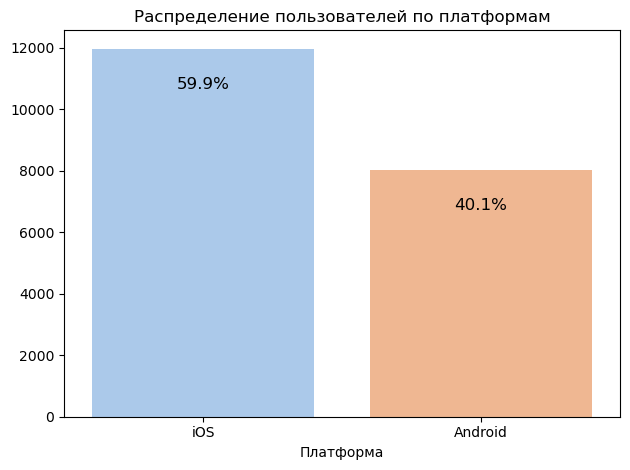

In [307]:
ax = sns.countplot(data=user_data_df, \
                   x="dominant_platform", \
                   order=user_data_df["dominant_platform"].value_counts().index, 
                   palette='pastel')

total = len(user_data_df)

# Добавляем проценты над столбцами
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), \
                ha='center', va='top', fontsize=12, \
                xytext=(0, -20),
                textcoords='offset points')

plt.title("Распределение пользователей по платформам")
plt.xlabel("Платформа")
# plt.ylabel("Количество пользователей")
plt.ylabel("")
plt.tight_layout()
plt.show()

##### Распределение пользователей по активности

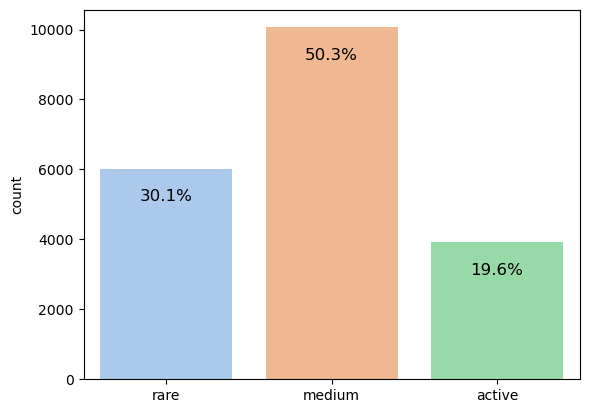

In [308]:
ax = sns.countplot(data=user_data_df, x="activity_category", \
                   order=["rare", "medium", "active"], \
                   palette='pastel')

counts = user_data_df["activity_category"].value_counts()
total = len(user_data_df)

# Добавляем проценты на график
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, -20), textcoords='offset points')
plt.xlabel("")
plt.show()

##### Какой источник для покупки премиум подписки использовался чаще?

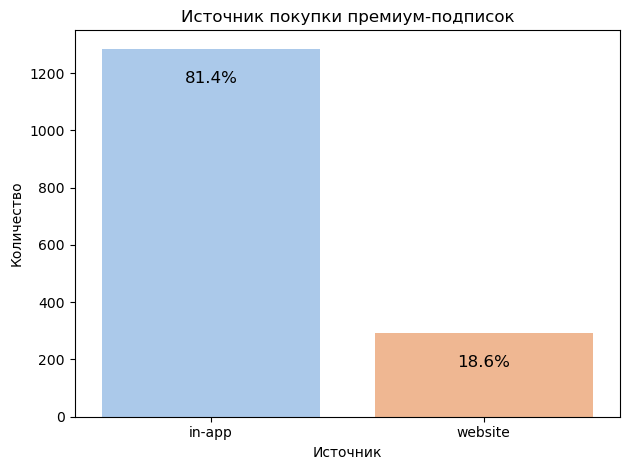

In [309]:
ax = sns.countplot(data=premium_purchases_df, x="purchase_source", palette='pastel')

total = len(premium_purchases_df)

for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y + total * 0.01), ha='center', va='bottom', \
                xytext=(0, -30), textcoords='offset points', fontsize=12)

plt.title("Источник покупки премиум-подписок")
plt.xlabel("Источник")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

##### Сколько раз пользователи покупали премиум?

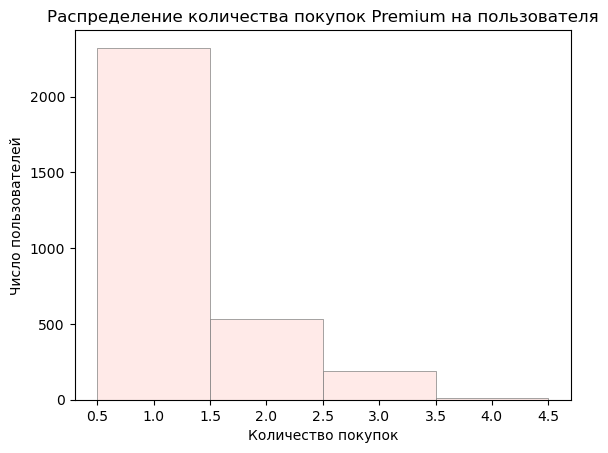

In [310]:
all_purchases_df = pd.concat([premium_purchases_df, premium_purchases_hist_df])

repeats = all_purchases_df.groupby('user_id').size().reset_index(name='purchase_count')

sns.histplot(repeats['purchase_count'], bins=5, discrete=True, color='mistyrose', \
            edgecolor='gray',
            linewidth=0.5 )
plt.title("Распределение количества покупок Premium на пользователя")
plt.xlabel("Количество покупок")
plt.ylabel("Число пользователей")
plt.show()

##### Топ-10 используемых премиум-функций

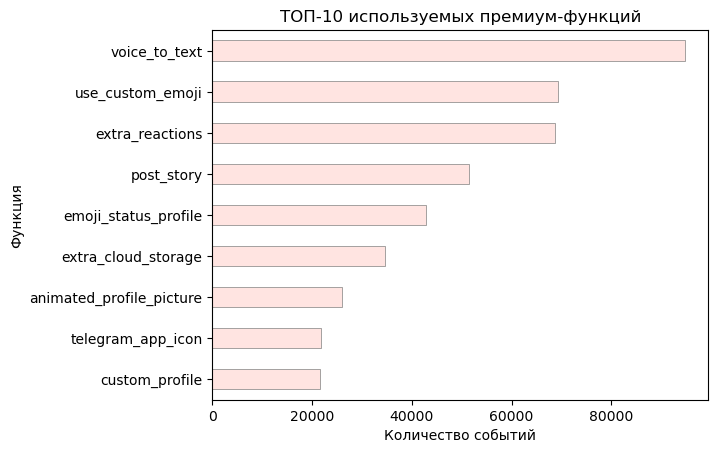

In [311]:
premium_event_types = [
    "use_custom_emoji", "post_story", "voice_to_text", "extra_cloud_storage",
    "emoji_status_profile", "custom_profile", "telegram_app_icon",
    "animated_profile_picture", "extra_reactions"
]
top_premium_features = logs_df[logs_df['event_type'].isin(premium_event_types)] \
                               .event_type.value_counts().head(10)

top_premium_features.plot(kind='barh', color='mistyrose', edgecolor='grey', linewidth=0.5)
plt.title("ТОП-10 используемых премиум-функций")
plt.xlabel("Количество событий")
plt.ylabel("Функция")
plt.gca().invert_yaxis()
plt.show()

## Аналитические задачи:

### 1. Какие метрики выбрать для отслеживания динамики покупок телеграм премиума?

Основные метрики:

• Количество новых подписчиков (New Premium Users) – сколько человек купило подписку впервые \
• Retention Rate (через 1/3/6 месяцев) – сколько пользователей продолжают подписку \
• Churn Rate – процент оттока подписчиков \
• Средний чек (ARPU – Average Revenue Per User) \
• Доля пользователей, купивших подписку, среди всех активных пользователей (Conversion Rate to Premium) 
<!-- • Выручка по платформам (App Store, Google Play, веб-оплата) -->

Дополнительно:

• Cohort Analysis – как ведут себя подписчики, купившие Premium в разные месяцы \
• LTV (Lifetime Value) – средний доход от подписчика за всё время \
• CAC (Customer Acquisition Cost) – сколько стоит привлечение Premium-пользователя


##### Количество новых подписчиков за последние полгода

In [316]:
# Считаем новых премиум пользователей
new_premium_users = premium_purchases_df[premium_purchases_df['timestamp'] == premium_purchases_df.groupby('user_id')['timestamp'].transform('min')]

# Количество новых подписчиков
new_premium_count = new_premium_users['user_id'].nunique()
print(f"Количество новых подписчиков: {new_premium_count}")

Количество новых подписчиков: 1578


##### Retention Rate (через 1/3/6 месяцев)

In [335]:
# Сколько пользователей продолжают использовать подписку через 1, 3 и 6 месяцев

# Добавим столбец с датой окончания подписки
premium_purchases_df['subscription_end'] = premium_purchases_df['timestamp'] \
                + pd.to_timedelta(premium_purchases_df['subscription_type'] \
                .map({'3_months': '90D', 
                      '6_months': '180D', 
                      '12_months': '365D'
}))

# Определим retention через 1, 3, 6 месяцев
def calculate_retention(months):
    retention_date = pd.to_datetime("2023-06-30") - pd.DateOffset(months=months)
    retained_users = premium_purchases_df[
        (premium_purchases_df['timestamp'] <= retention_date) &
        (premium_purchases_df['subscription_end'] > retention_date)
    ]
    return retained_users['user_id'].nunique()

# Retention rate через 1, 3 и 6 месяцев
retention_1_month = calculate_retention(1)
retention_3_months = calculate_retention(3)
retention_6_months = calculate_retention(6)

print(f"Retention через 1 месяц: {retention_1_month}")
print(f"Retention через 3 месяца: {retention_3_months}")
print(f"Retention через 6 месяцев: {retention_6_months}")

Retention через 1 месяц: 1124
Retention через 3 месяца: 734
Retention через 6 месяцев: 0


##### Churn Rate

In [323]:
# Churn rate
def calculate_churn_rate():
    churned_users = premium_purchases_df[
        (premium_purchases_df['subscription_end'] < pd.to_datetime("2023-06-30")) &
        (premium_purchases_df['subscription_end'] < pd.to_datetime("2023-06-30"))
    ]
    churn_rate = len(churned_users) / len(new_premium_users) * 100
    return churn_rate

churn_rate = calculate_churn_rate()
print(f"Churn Rate: {churn_rate:.2f}%")

Churn Rate: 17.87%


##### Средний чек (ARPU – Average Revenue Per User)

In [324]:
# Рассчитаем выручку за каждый месяц
premium_purchases_df['revenue'] = premium_purchases_df['purchase_price']

# ARPU (средний доход на пользователя)
total_revenue = premium_purchases_df['revenue'].sum()
total_users = len(premium_purchases_df['user_id'].unique())
arpu = total_revenue / total_users
print(f"Средний чек (ARPU): {arpu:.2f} руб.")

Средний чек (ARPU): 1880.75 руб.


#####  Доля пользователей, купивших подписку, среди всех активных пользователей (Conversion Rate to Premium)

In [327]:
# Активные пользователи
active_users = user_data_df[user_data_df['activity_category'] == 'active']

# Conversion rate to premium
conversion_rate = len(new_premium_users) / len(active_users) * 100
print(f"Конверсия в покупку премиума у АКТИВНЫХ пользователей: {conversion_rate:.2f}%")

Конверсия в покупку премиума у АКТИВНЫХ пользователей: 40.28%


#####  Доля пользователей, купивших подписку, среди всех пользователей (Conversion Rate to Premium)

In [330]:
# Объединяем ID пользователей, купивших премиум (в любом году)
all_premium_ids = pd.concat([premium_purchases_df['user_id'], \
                             premium_purchases_hist_df['user_id']]).unique()

january_premium_ids = premium_purchases_df['user_id'].unique()

# Общая доля таких пользователей
total_users = user_data_df['user_id'].nunique()
premium_users = len(all_premium_ids)
premium_ratio = premium_users / total_users

premium_users_6 = len(january_premium_ids)
premium_ratio_6 = premium_users_jan / total_users

print(f"Премиум покупали ВСЕГО: {premium_users} из {total_users} пользователей")
print(f"Конверсия: {premium_ratio:.2%}")
print()
print(f"За полгода премиум купили: {premium_users_6} из {total_users} пользователей")
print(f"Конверсия: {premium_ratio_jan:.2%}")

Премиум покупали ВСЕГО: 3052 из 20000 пользователей
Конверсия: 15.26%

За полгода премиум купили: 1578 из 20000 пользователей
Конверсия: 7.89%


##### Cohort Analysis

In [331]:
# Создадим столбец с месяцем покупки
premium_purchases_df['purchase_month'] = premium_purchases_df['timestamp'].dt.to_period('M')

# Группируем пользователей по месяцам покупки
cohort_analysis = premium_purchases_df.groupby('purchase_month')['user_id'].nunique()

# Выведем когортный анализ
print("Cohort Analysis (по месяцам):")
print(cohort_analysis)

Cohort Analysis (по месяцам):
purchase_month
2023-01    275
2023-02    217
2023-03    261
2023-04    280
2023-05    289
2023-06    256
Freq: M, Name: user_id, dtype: int64


##### LTV (Lifetime Value)

In [333]:
# средняя выручка на пользователя, умноженная на средний срок жизни пользователя
ltv = total_revenue / len(new_premium_users)
print(f"LTV (Lifetime Value): {ltv:.2f} руб.")

LTV (Lifetime Value): 1880.75 руб.


##### CAC (Customer Acquisition Cost)

In [334]:
# Допустим, что у нас есть расходы на маркетинг
marketing_expenses = 50000  # Примерные расходы

# CAC (стоимость привлечения клиента)
cac = marketing_expenses / len(new_premium_users)
print(f"CAC (Customer Acquisition Cost): {cac:.2f} руб.")

CAC (Customer Acquisition Cost): 31.69 руб.


### Какие данные подготовить, чтобы продемонстрировать информацию о выручке за последние 6 месяцев?

• График Monthly Revenue (MRR – Monthly Recurring Revenue) – выручка по месяцам \
• Таблицу с разбивкой по платформам (iOS, Android, Desktop) \
• Динамику подписок и отписок \
• Средний чек и ARPU по месяцам

Формат отчёта:

1. Дашборд в Tableau/Looker/Power BI
2. Графики в Jupyter Notebook (Python, Pandas, Matplotlib)
3. Таблица в Excel с ключевыми цифрами



##### Monthly Recurring Revenue (MRR) – выручка по месяцам

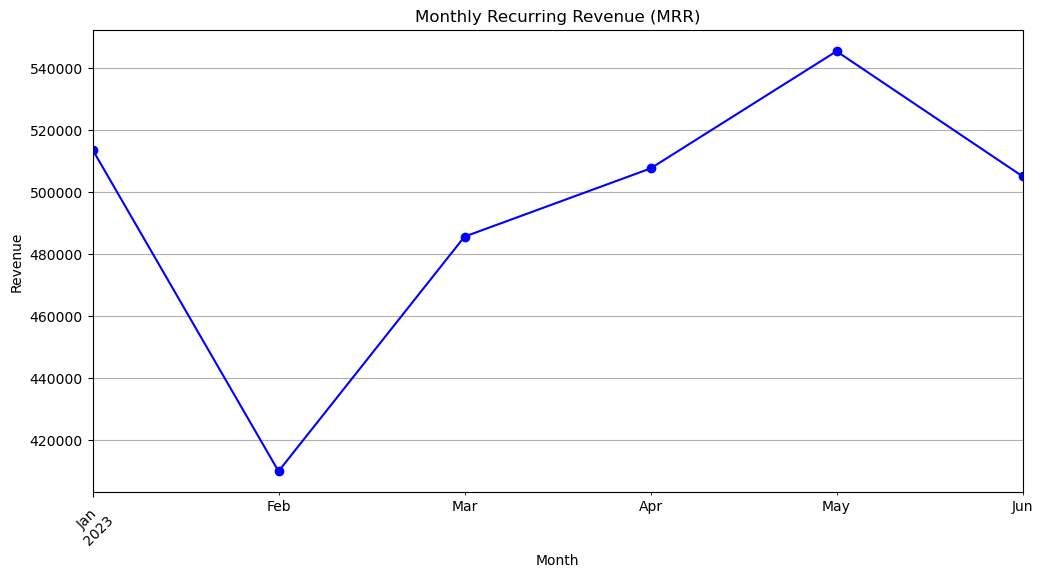

In [339]:
# Добавляем колонку с месячным доходом от подписки
# premium_purchases_df['revenue'] = premium_purchases_df['purchase_month'].map(price_by_type)

# Группируем по месяцам покупки и суммируем выручку
monthly_revenue = premium_purchases_df.groupby('purchase_month')['revenue'].sum()

# Строим график выручки по месяцам
plt.figure(figsize=(12, 6))
monthly_revenue.plot(kind='line', color='b', marker='o')
plt.title('Monthly Recurring Revenue (MRR)')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

##### Выручка по платформам (iOS, Android, Desktop)

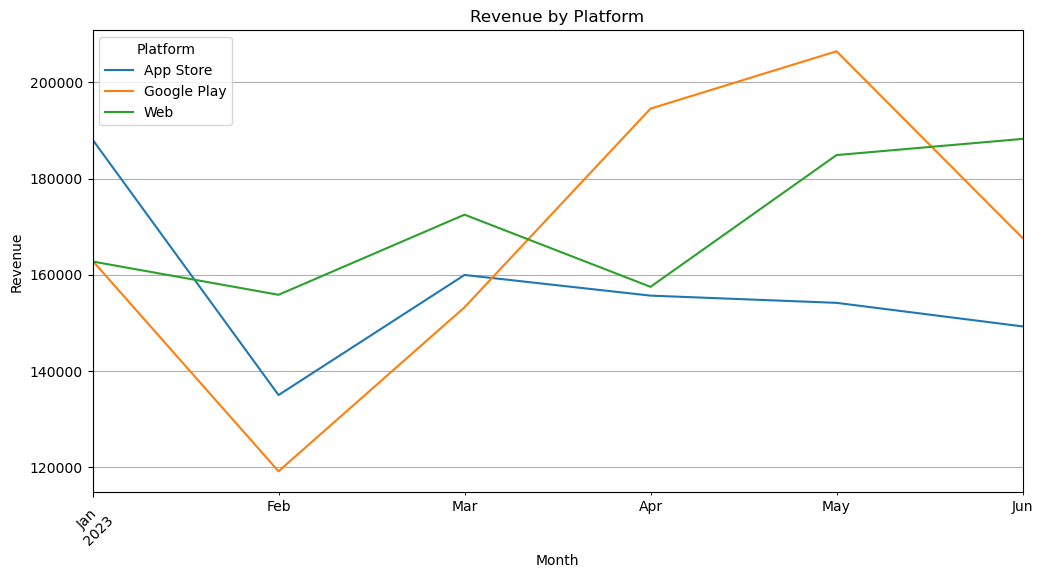

In [342]:
# Добавляем столбец с платформой (предполагается, что этот столбец уже есть)
premium_purchases_df['platform'] = np.random.choice(['App Store', 'Google Play', 'Web'], len(premium_purchases_df))

# Группируем по месяцам и платформам и считаем сумму выручки
platform_revenue = premium_purchases_df.groupby(['purchase_month', 'platform'])['revenue'].sum().unstack()

# Строим график выручки по платформам
platform_revenue.plot(kind='line', figsize=(12, 6))
plt.title('Revenue by Platform')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.grid(True)
plt.show()

##### Динамика подписок и отписок

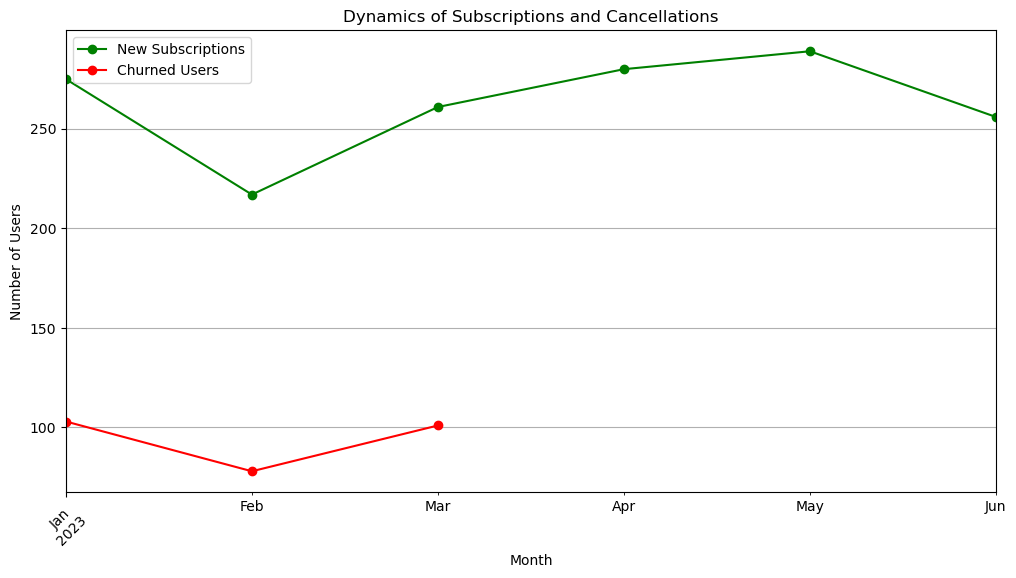

In [345]:
# Подписки
subscriptions = premium_purchases_df.groupby('purchase_month')['user_id'].nunique()

# Отписки (пользователи, у которых дата окончания подписки уже прошла)
churn = premium_purchases_df[premium_purchases_df['subscription_end'] <= pd.Timestamp('2023-06-30')].groupby('purchase_month')['user_id'].nunique()

# Строим график подписок и отписок
plt.figure(figsize=(12, 6))
subscriptions.plot(kind='line', color='g', marker='o', label='New Subscriptions')
churn.plot(kind='line', color='r', marker='o', label='Churned Users')
plt.title('Dynamics of Subscriptions and Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

#####  Средний чек (ARPU) по месяцам

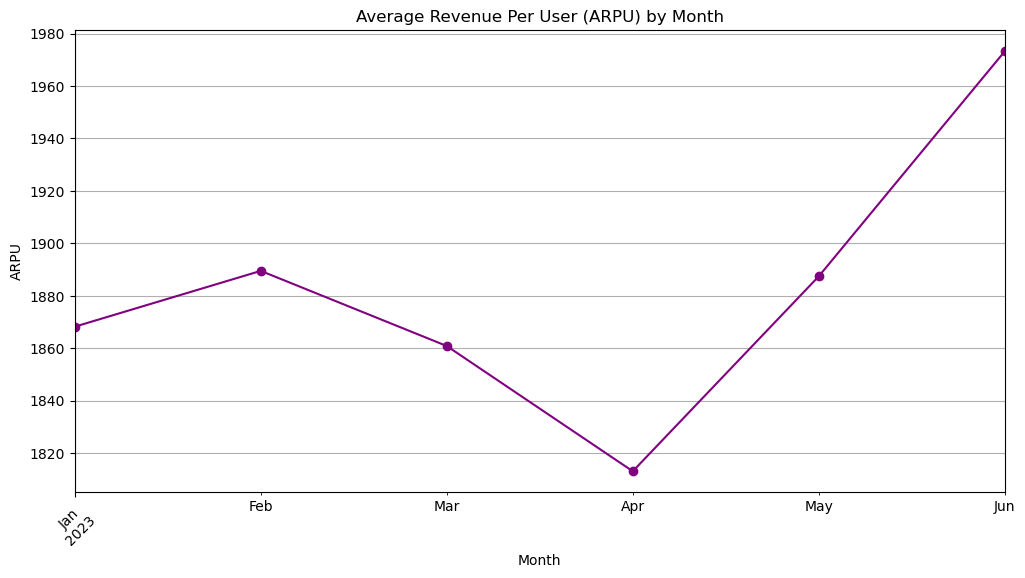

In [346]:
# Рассчитываем ARPU по месяцам
monthly_arpu = monthly_revenue / subscriptions

# Строим график ARPU по месяцам
plt.figure(figsize=(12, 6))
monthly_arpu.plot(kind='line', color='purple', marker='o')
plt.title('Average Revenue Per User (ARPU) by Month')
plt.xlabel('Month')
plt.ylabel('ARPU')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Какую метрику выбрать для отслеживания числа заходов пользователей в Telegram за месяц?

Метрикy MAU (Monthly Active Users) – количество уникальных пользователей, зашедших в Telegram хотя бы раз за месяц - использовать **НЕ** целесообразно, так как телеграм - это мессенджер, и если пользователь заходит раз в месяц - это не показатель

=> предлагаю использовать DAU и WAU, а также среднее число заходов на пользователя

То есть:

• DAU (Daily Active Users) – активность по дням \
• WAU (Weekly Active Users) – активность по неделям \
• Среднее число заходов на пользователя

<!-- Как это измерять? \
• Логируем каждое открытие приложения \
• Учитываем пользователей, отправивших хотя бы одно сообщение (чтобы отсечь “случайные” открытия) \
• Строим тренды и сезонность -->


##### DAU – Daily Active Users

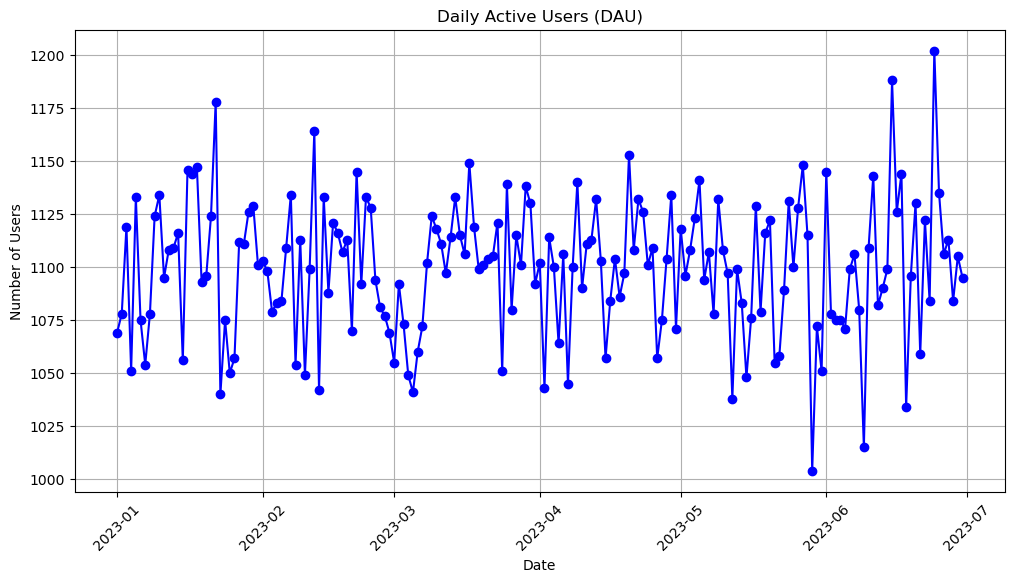

In [350]:
# Фильровать буду по событию "open_dialog", так как в телеграм можно активно 
# заходить не только для переписки, но и для просмотра чатов / каналов

open_dialog_logs = logs_df[logs_df['event_type'] == 'open_dialog']

# Группируем по дате и считаем уникальных пользователей
dau = message_logs.groupby(open_dialog_logs['timestamp'].dt.date)['user_id'].nunique()

# Строим график DAU
plt.figure(figsize=(12, 6))
dau.plot(kind='line', color='b', marker='o')
plt.title('Daily Active Users (DAU)')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### WAU – Weekly Active Users

/var/folders/4r/l6jgz7s11rs2s5hc02k5l7z00000gn/T/ipykernel_25272/1184984312.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



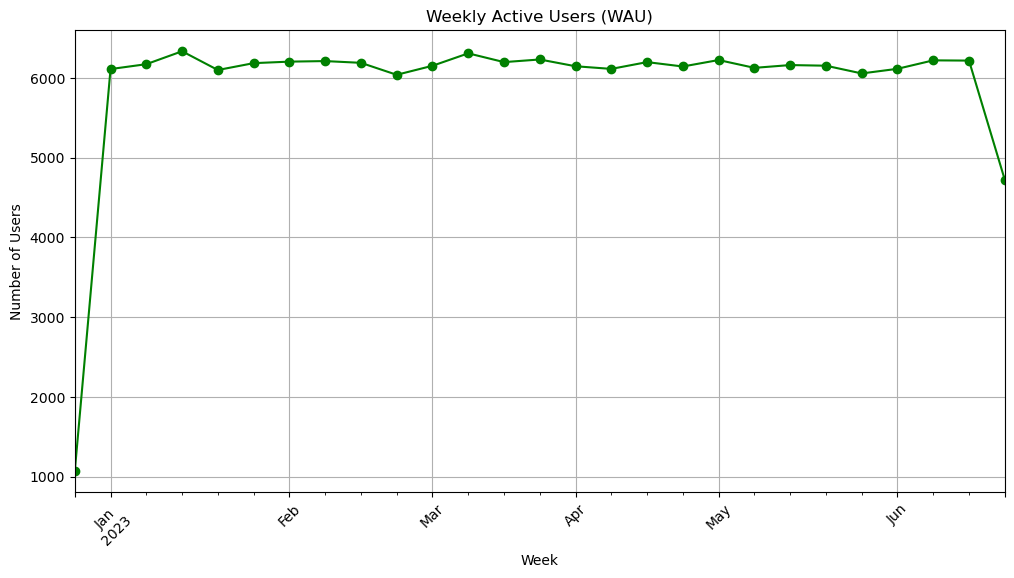

In [351]:
# Создаем столбец с неделей для группировки
open_dialog_logs['week'] = open_dialog_logs['timestamp'].dt.to_period('W').dt.start_time

# Группируем по неделям и считаем уникальных пользователей
wau = open_dialog_logs.groupby('week')['user_id'].nunique()

# Строим график WAU
plt.figure(figsize=(12, 6))
wau.plot(kind='line', color='g', marker='o')
plt.title('Weekly Active Users (WAU)')
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### Среднее число заходов на пользователя

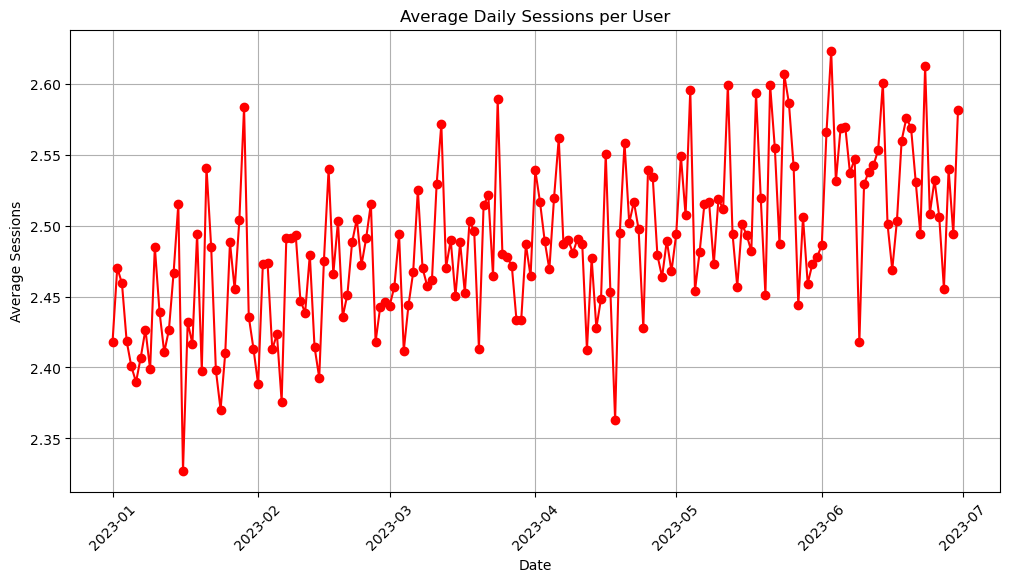

In [352]:
# Для вычисления среднего числа заходов на пользователя можно разделить общее 
# количество сессий или событий (в нашем случае, сообщений) на количество уникальных 
# пользователей в течение дня или недели

# Группируем по дате и пользователю, считаем количество событий
daily_sessions = open_dialog_logs.groupby([open_dialog_logs['timestamp'].dt.date, 'user_id']).size()

# Рассчитываем среднее количество событий на пользователя за день
avg_daily_sessions_per_user = daily_sessions.groupby('timestamp').mean()

# Строим график
plt.figure(figsize=(12, 6))
avg_daily_sessions_per_user.plot(kind='line', color='r', marker='o')
plt.title('Average Daily Sessions per User')
plt.xlabel('Date')
plt.ylabel('Average Sessions')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

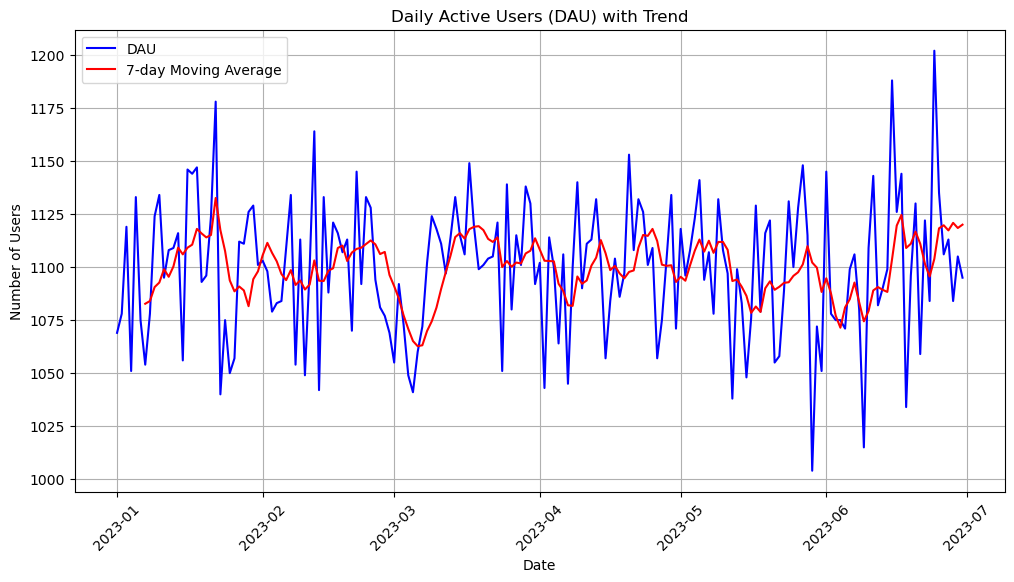

In [353]:
# Рассчитываем скользящее среднее (например, для DAU)
dau_smoothed = dau.rolling(window=7).mean()

# Строим график с трендом
plt.figure(figsize=(12, 6))
dau.plot(kind='line', color='b', label='DAU')
dau_smoothed.plot(kind='line', color='r', label='7-day Moving Average')
plt.title('Daily Active Users (DAU) with Trend')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Гипотезы для проверки:

1. `Поведение до и после подписки`

Можно взять пользователей, купивших подписку, и посмотреть, как меняется их активность: отправка сообщений, использование функций.


2. `Анализ оттока (churn)`

Если пользователь не продлевает подписку — сколько времени он был активен до этого? Можно ли предсказать churn?


3. `Анализ “первой подписки”`

Что объединяет пользователей, оформивших первую подписку? Возможно, есть паттерны в активности до покупки.

In [312]:
user_counts = premium_purchases_df.groupby('user_id').size()
unique_counts = user_counts.value_counts()
unique_counts

1    1578
dtype: int64

In [313]:
user_counts = premium_purchases_hist_df.groupby('user_id').size()
unique_counts = user_counts.value_counts()
unique_counts

1    950
2    485
3    165
dtype: int64